## get the hashes that were unclassified, count how often these are present.
From around 150 metagenomes, more was slow

Set a threshold at 2,5, and 10:
- 1: hash was found at least twice in that metagenome
- 5: hash was found at least 5x
- 20: hash was found at least 10x


Hashes that are found only once: sequencinf error


In [6]:
# get number of unassigned vs how many of the unassigned are only there once
import pandas as pd
df = pd.read_csv('../data/251028_agg_by_domain.csv')
df_pivot = df.pivot(index='ident', columns='domain', values='n_unique_weighted_found').reset_index()
df_pivot['total_weighted_hashes'] = df.groupby('ident')['total_weighted_hashes'].first().values
cols = ['ident', 'Eukaryota', 'd__Archaea', 'd__Bacteria', 'plasmids', 'total_weighted_hashes']
df_pivot = df_pivot[cols]
df_pivot['known_hashes'] = df_pivot.drop(columns=['ident', 'total_weighted_hashes']).sum(axis=1)
df =df_pivot
df['Archaea+Bacteria'] = df['d__Archaea'] + df['d__Bacteria']

In [7]:
df = df[['ident','total_weighted_hashes', 'known_hashes']]
df

domain,ident,total_weighted_hashes,known_hashes
0,ERR1135178,404363,256538.0
1,ERR1135230,422859,215796.0
2,ERR1135262,370481,176823.0
3,ERR1135274,400820,273285.0
4,ERR1135303,476148,280096.0
...,...,...,...
157,SRR8960923,281535,189300.0
158,SRR8960932,319482,222257.0
159,SRR8960950,297773,186198.0
160,SRR8960959,353204,217163.0


In [9]:
df['unknown_hashes'] = df['total_weighted_hashes'] - df['known_hashes']

/var/folders/b5/q0xwwzss4dd82xbt_8lh5qph0000gn/T/ipykernel_44988/1737982876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unknown_hashes'] = df['total_weighted_hashes'] - df['known_hashes']


In [8]:
# so m10 has -m 10, so hashes with abundance greater than 10. (sum_hashes)
df_filtered_hash = pd.read_csv('../data/sum_hashes_filter.csv')

In [10]:
df =  df.merge(df_filtered_hash, on='ident')

In [16]:
# cols of importance
cols = ["unknown_hashes", "m10", "m5", "m2"]


dfp = df[["ident", "total_weighted_hashes"] + cols].copy()
for c in cols:
    dfp[f"{c}_percent"] = df[c] / df["total_weighted_hashes"] * 100

In [17]:
dfp

,ident,total_weighted_hashes,unknown_hashes,m10,m5,m2,unknown_hashes_percent,m10_percent,m5_percent,m2_percent
0,ERR1135178,404363,147825.0,22698,32259,49203,36.557499,5.613273,7.977733,12.168027
1,ERR1135230,422859,207063.0,16852,28204,56701,48.967386,3.985253,6.669836,13.408961
2,ERR1135262,370481,193658.0,20806,39893,87386,52.272046,5.615943,10.767894,23.587175
3,ERR1135274,400820,127535.0,16135,23249,35855,31.818522,4.025498,5.800359,8.945412
4,ERR1135303,476148,196052.0,4815,14047,46825,41.174593,1.011240,2.950133,9.834127
...,...,...,...,...,...,...,...,...,...,...
157,SRR8960923,281535,92235.0,6216,12275,26900,32.761468,2.207896,4.360026,9.554762
158,SRR8960932,319482,97225.0,11734,17034,29065,30.432074,3.672820,5.331756,9.097539
159,SRR8960950,297773,111575.0,4372,10756,29759,37.469818,1.468233,3.612148,9.993854
160,SRR8960959,353204,136041.0,7745,14546,32121,38.516268,2.192784,4.118300,9.094178


In [20]:
dfp_sorted

,ident,total_weighted_hashes,unknown_hashes,m10,m5,m2,unknown_hashes_percent,m10_percent,m5_percent,m2_percent
125,SRR8960176,2638127,907180.0,308882,345191,416834,34.387276,11.708383,13.084700,15.800377
111,SRR17241692,2169111,692371.0,100240,142563,221244,31.919574,4.621248,6.572416,10.199755
110,SRR17241657,1844351,658705.0,132278,194045,295849,35.714731,7.172062,10.521045,16.040819
106,SRR17241531,1763884,648458.0,143953,213512,331363,36.763075,8.161138,12.104651,18.785986
109,SRR17241613,1616825,504292.0,40345,61847,119562,31.190265,2.495323,3.825213,7.394863
...,...,...,...,...,...,...,...,...,...,...
67,SRR11125963,95898,17335.0,1953,2386,4505,18.076498,2.036539,2.488060,4.697700
74,SRR11126500,82508,16808.0,1131,2677,5112,20.371358,1.370776,3.244534,6.195763
72,SRR11126153,81182,16367.0,343,725,2575,20.160873,0.422507,0.893055,3.171885
63,SRR11125741,83217,16072.0,284,603,3127,19.313361,0.341276,0.724612,3.757646


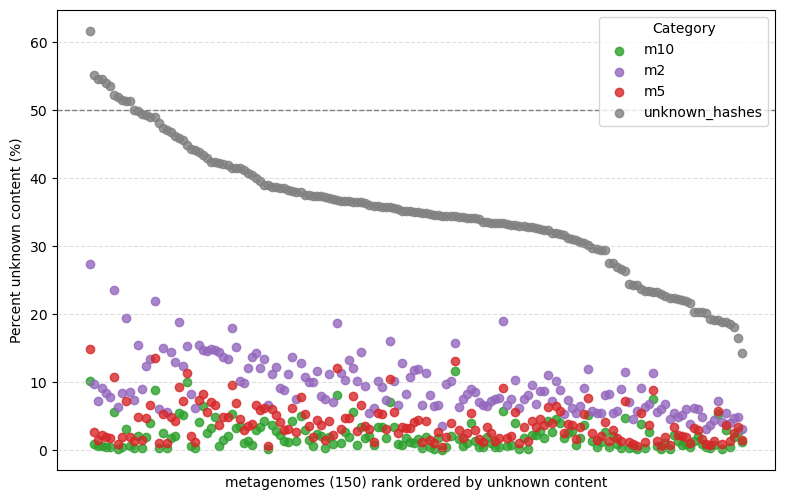

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Choose columns
cols_percent = [c for c in dfp.columns if c.endswith('_percent')]

# Sort by known_percent
dfp_sorted = dfp.sort_values("unknown_hashes_percent", ascending=False)

# Melt long-form
dfm = dfp_sorted.melt(
    id_vars="ident",
    value_vars=cols_percent,
    var_name="category",
    value_name="percent"
)
dfm["category"] = dfm["category"].str.replace("_percent", "", regex=False)

# Define fixed colors per category
colors = {
    "known_hashes": "#1f77b4",
    "unknown_hashes": "grey",
    "m10": "#2ca02c",
    "m5": "#d62728",
    "m2": "#9467bd"
}

# Plot
plt.figure(figsize=(8, 6))
for cat, sub in dfm.groupby("category"):
    plt.scatter(sub["ident"], sub["percent"], label=cat, color=colors.get(cat, "gray"), alpha=0.8)

plt.xlabel("metagenomes (150) rank ordered by unknown content")
plt.ylabel("Percent unknown content (%)")
# plt.title("Percentages per Ident (stacked, fixed colors)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Category")
plt.axhline(y=50, color="gray", linestyle="--", linewidth=1)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.xticks([])
plt.show()
